In [1]:
import json
import xtrack as xt
import xpart as xp
import xobjects as xo
import PyNAFF
from matplotlib import pyplot as plt
import numpy as np

context = xo.ContextCpu()

#with open('../data/collider_thin.json') as f:
#    dct = json.load(f)

#line = xt.Line.from_dict(dct['lines']['lhcb1'])
#line_edited =line.copy()

collider = xt.Multiline.from_json('../data/collider_thin.json')

line = collider['lhcb1']
for ii in line.elements:
   # if ii is a type 'multipole' 
    if type(ii) == xt.beam_elements.elements.Multipole:
        if len(ii.knl)>2:
            #print(ii)
            ii.knl[2] = 0

line.vars['i_oct_b1'] = 0
line.vars['i_sext_b1'] = 0

line_edited = line.copy()
plt.close('all')

Done loading line from dict.           


Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           


In [2]:
#Only one particle
my_particle = xp.Particles(
                    mass0=xp.PROTON_MASS_EV, q0=1, energy0=7000e9, x = 0.003)
line.particle_ref = my_particle
num_turns = 2000
sampling_frequency = 11245.5

num_particles = 3
monitor_ip3 = xt.ParticlesMonitor(start_at_turn=0, stop_at_turn=num_turns,
                                    num_particles=num_particles)
monitor_ip5 = xt.ParticlesMonitor(start_at_turn=0, stop_at_turn=num_turns,
                                    num_particles=num_particles)
monitor_ip8 = xt.ParticlesMonitor(start_at_turn=0, stop_at_turn=num_turns,
                                    num_particles=num_particles)
line.insert_element(index='ip3', element=monitor_ip3, name='mymon3')
line.insert_element(index='ip5', element=monitor_ip5, name='mymon5')
line.insert_element(index='ip8', element=monitor_ip8, name='mymon8')




line.build_tracker()


monitor = xt.ParticlesMonitor(_context=context,
                              start_at_turn=0, stop_at_turn=num_turns,
                              num_particles=num_particles)
line.track(my_particle, num_turns=num_turns, freeze_longitudinal=True)

aux = line.twiss()

Found suitable prebuilt kernel `default_only_xtrack`.
Found suitable prebuilt kernel `only_xtrack_frozen_longitudinal`.


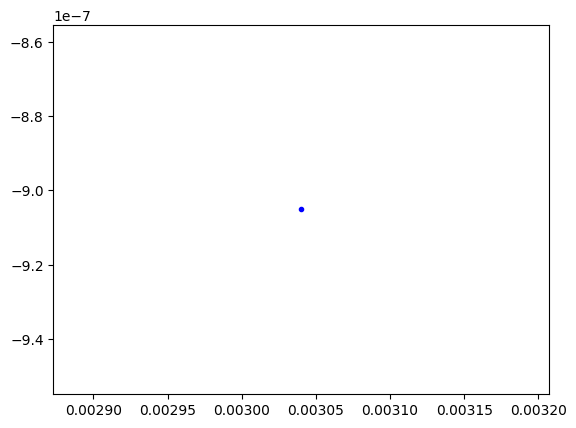

In [3]:
plt.plot(my_particle.x, my_particle.px, '.b') 

In [4]:
monitors = {}  # Create an empty dictionary to store the monitors
#num_particles = 2
#num_turns = 50
line_edited.discard_tracker()
for jj, ii in enumerate((['ip3']+list(aux[:, 'bpm.*']['name']))):
    monitor_name = f"mymon_{ii.replace('.', '_')}"
    monitors[monitor_name] = xt.ParticlesMonitor(start_at_turn=0, stop_at_turn=num_turns, num_particles=num_particles)
    line_edited.insert_element(index=ii,
                                element=monitors[monitor_name], 
                                name=monitor_name)
                            


In [5]:
# Exciter is working

'''
f = 10
phi = 0
A = 0.08
sampling_frequency = 11245.5
total_time = num_turns / sampling_frequency
time = np.arange(0, total_time, 1/sampling_frequency)
samples = A * np.sin(2*np.pi*f*time + phi)


exciter = xt.Exciter(_context = context,
    samples = samples,
    sampling_frequency = sampling_frequency,
    duration = None,  # defaults to waveform duration
    frev = sampling_frequency,
    start_turn = num_turns/2,  # default, seconds
    knl = [0.02],  # default, no kick
     # default, no kick
    #knl = [1],
    #ksl = []
)

# Add it to the line for tracking as usual
line_edited.insert_element(
    element = exciter,
    name = 'RF_KO_EXCITER',
    index = 42,
)

#insertion of the element in the beamline, the phase should be broken due to the kick
'''


"\nf = 10\nphi = 0\nA = 0.08\nsampling_frequency = 11245.5\ntotal_time = num_turns / sampling_frequency\ntime = np.arange(0, total_time, 1/sampling_frequency)\nsamples = A * np.sin(2*np.pi*f*time + phi)\n\n\nexciter = xt.Exciter(_context = context,\n    samples = samples,\n    sampling_frequency = sampling_frequency,\n    duration = None,  # defaults to waveform duration\n    frev = sampling_frequency,\n    start_turn = num_turns/2,  # default, seconds\n    knl = [0.02],  # default, no kick\n     # default, no kick\n    #knl = [1],\n    #ksl = []\n)\n\n# Add it to the line for tracking as usual\nline_edited.insert_element(\n    element = exciter,\n    name = 'RF_KO_EXCITER',\n    index = 42,\n)\n\n#insertion of the element in the beamline, the phase should be broken due to the kick\n"

In [6]:
#plt.plot(time, samples)

In [7]:

line_edited.particle_ref = my_particle
line_edited.discard_tracker()
line_edited.build_tracker()
#print(line_edited.twiss()[:,'mymon_.*'])
#len(line_edited.twiss()[:,'mymon_.*']['mux'])


Found suitable prebuilt kernel `default_only_xtrack`.


In [8]:
#dir(aux)

In [9]:
#line_edited.twiss()[:, 'mymon_.*'].mux
#print(len(line_edited.twiss()[:, 'mymon_.*'].mux))

In [10]:
# generates a matched gaussian bunch and tracks it through the line
# the line is then edited to include BPMs and the bunch is tracked again
# the BPMs are then used to calculate the emittance of the bunch
# 
particles = xp.Particles(
                    mass0=xp.PROTON_MASS_EV, q0=1, energy0=7000e9, x=[0.003, 0.002, 0.001])

particle_0 = xp.Particles(
                    mass0=xp.PROTON_MASS_EV, q0=1, energy0=7000e9, x=[0.003, 0.002, 0.001])
#particle_0 = xp.Particles(
                 #   mass0=xp.PROTON_MASS_EV, q0=1, energy0=7000e9, x=0.003)

#particles = xp.generate_matched_gaussian_bunch(line=line,
                                           #    num_particles=num_particles,
                                           #    nemitt_x=2.5e-6,
                                           #    nemitt_y=2.5e-6,
                                           #    sigma_z=9e-2, particle_ref=particles)
line_edited.track(particles, num_turns=num_turns, freeze_longitudinal=True)


Found suitable prebuilt kernel `only_xtrack_frozen_longitudinal`.


Text(0, 0.5, 'px [rad]')

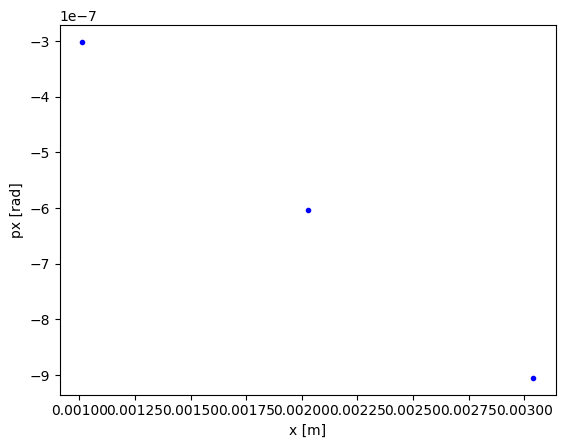

In [11]:
plt.plot(particles.x, particles.px, '.b')
plt.xlabel('x [m]')
plt.ylabel('px [rad]')

15000
2000


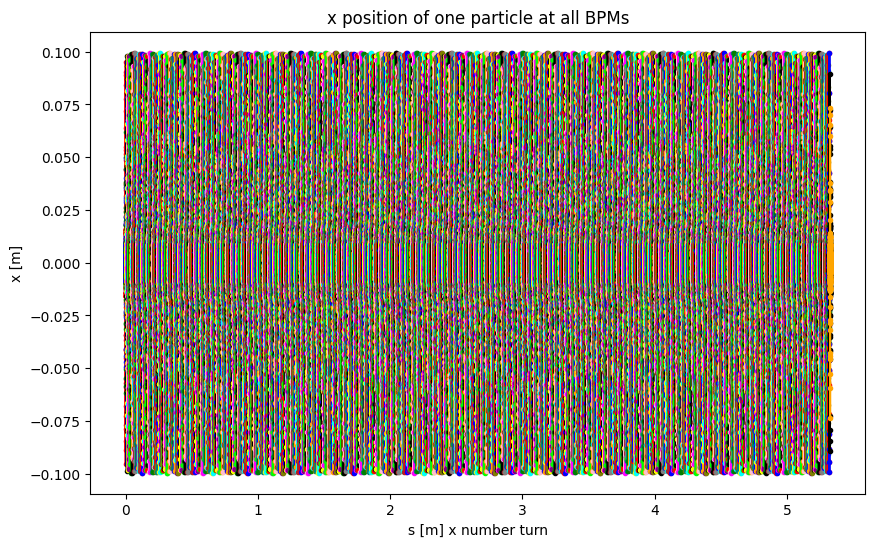

In [12]:

plt.figure(figsize=(10, 6))
#s_list = [monitors[ii].s[0,0] for ii in monitors]
#print(s_list[0])
#for jj in range(len(monitors)
n = np.arange(0, num_turns)
twiss = line_edited.twiss()
mux = twiss[:,'mymon.*'].mux
betx = twiss[:,'mymon.*'].betx
#print(len(twiss['mux']))
#mux = twiss.mux
#print(len(mux))
#print(n)
x_list_all = []
x_list0 = []  
s_list0 = []
c = 1000*['red', 'green', 'blue', 'black', 'orange', 'yellow', 'pink', 'cyan', 'magenta', 'brown', 'purple', 'gray', 'olive', 'lime', 'teal']
print(len(c))
for jj in n:
    #print(jj)
    x_list = [monitors[ii].x[0,jj] for ii in monitors]   #monitors[ii].x[i,j], i is the particle number, j is the turn number

    #x_list0 = [monitors[ii].x[0,0] for ii in monitors]
    s_list = [monitors[ii].s[0,jj] for ii in monitors]
    x_list_all.extend(x_list)
    #print(len(x_list_all))
    mon = monitors['mymon_ip3'].x[0,jj]  #just the first particle, one monitor for all turns
    mon_position = monitors['mymon_ip3'].s[0,jj]    
    #mux = twiss[:,'mymon_ip3'].mux
    #print(mux)
    x_list0.append(mon)  
    s_list0.append(mon_position) #

    #print(s_list)
    #plt.plot(s_list+(jj)*s_list[-1], x_list, '.-r')
    plt.plot((s_list + jj*s_list[-1])/1e7, x_list, '.-', color=c[jj])
    
    
    #plt.plot(mux, x_list/np.sqrt(betx), '.-r')
    #plt.xlim(0,4)

    
#plt.plot(s_list, x_list0, 1'.-b')
#print(s_list0)
x = np.fft.fft(x_list_all)

plt.xlabel('s [m] x number turn')
plt.ylabel('x [m]')
plt.title('x position of one particle at all BPMs')
print(len(x_list0))
plt.show()

#fft_try = abs(np.fft.fft(x_list0 - np.mean(x_list0)))
fft_try = np.fft.fft(x_list0) # fft of one monitor for all turns
fft_try = fft_try/len(fft_try)*2 #normalization
fft = fft_try.real + 1j*fft_try.imag 
# 
fft_used = abs(fft) - np.mean(abs(fft))
#freq_try = np.fft.fftfreq(len(fft_used), d = 1/len(fft_used))
#freq_try = np.fft.fftfreq(len(x_list0), d = 1/len(x_list0))

freq_try  =  np.linspace(0, sampling_frequency, len(fft_used))

plt.show()




Text(0, 0.5, 'x [m]')

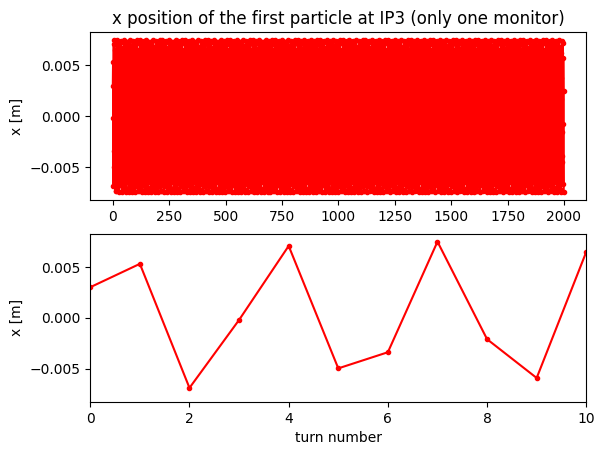

In [13]:
plt.subplot(2,1,1)
plt.title('x position of the first particle at IP3 (only one monitor)')
plt.plot(np.arange(num_turns), x_list0, '.-r') 
plt.ylabel('x [m]')
plt.subplot(2,1,2)
plt.plot(np.arange(num_turns), x_list0, '.-r')
plt.xlim(0, 10)
plt.xlabel('turn number')
plt.ylabel('x [m]')


amplitude_fit 0.0006813349085309096
frequency_fit 1.000000000001082


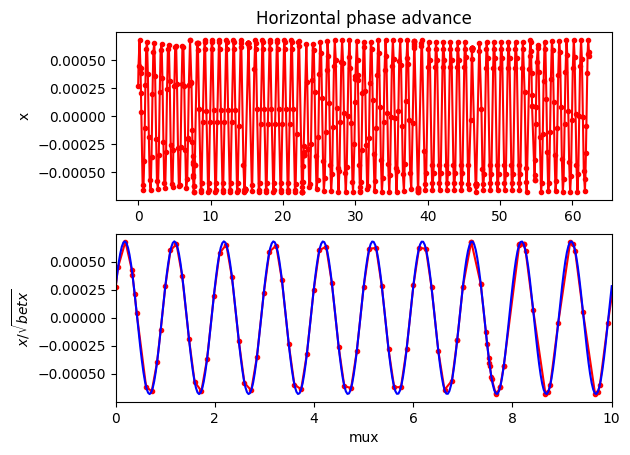

In [14]:
# Data for only the first turn, all BPMs
#print('betx', betx)
y_data = x_list_all[0:len(mux)]/np.sqrt(betx)
#y_data = x_list_all[len(mux)*int(num_turns/2):len(mux)*int(num_turns/2+1)]/np.sqrt(betx)
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
def sine_function(x, amplitude, frequency, phase, offset):
    return amplitude * np.sin(2 * np.pi * frequency * x + phase) + offset

# Fit the sine function to the data
initial_guess = [2, 1, 0, 1]  # Initial guess for the parameters
fit_params, _ = curve_fit(sine_function, mux, y_data, p0=initial_guess)

# Extract the fitted parameters
amplitude_fit, frequency_fit, phase_fit, offset_fit = fit_params

x_fine = np.linspace(min(mux), max(mux), 2000)
# Generate the fitted curve using the fitted parameters
#y_fit = sine_function(x_fine, amplitude_fit, frequency_fit, phase_fit, offset_fit)

fitted_sine_interpolated = interp1d(x_fine, sine_function(x_fine, amplitude_fit, frequency_fit, phase_fit, offset_fit))
y_fine = fitted_sine_interpolated(x_fine)


plt.subplot(2,1,1)

plt.plot(mux, x_list_all[0:len(mux)]/np.sqrt(betx), '.-r')
#plt.plot(mux, x_list_all[len(mux)*int(num_turns/2+1):len(mux)*int(num_turns/2+2)]/np.sqrt(betx), '.-r')
#plt.plot(x_fine,y_fine, '-b')
plt.title('Horizontal phase advance')
plt.ylabel('x')
plt.subplot(2,1,2)
plt.plot(mux, x_list_all[0:len(mux)]/np.sqrt(betx), '.-r')
#plt.plot(mux, x_list_all[len(mux)*int(num_turns/2+1):len(mux)*int(num_turns/2+2)]/np.sqrt(betx), '.-r')
plt.plot(x_fine,y_fine, '-b')
plt.xlim(0,10)
#plt.xlim(20, 40)
#print('mux', twiss[:,'mymon.*'].mux)
#print('len mux', len(twiss[:,'mymon.*'].mux))
#print('twiss.mux', len(twiss.mux))

plt.xlabel('mux')
plt.ylabel('$x/\sqrt{betx}$')
print('amplitude_fit', amplitude_fit)
print('frequency_fit', frequency_fit)

The tune is 0.31


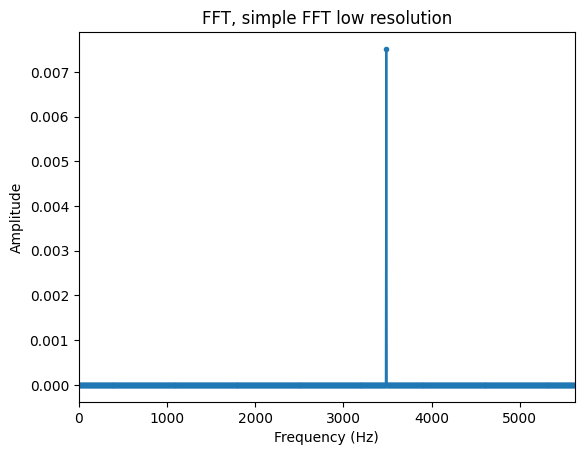

In [15]:
fft_try = np.fft.fft(x_list0)

# Normalize the FFT result
fft_normalized = fft_try / len(fft_try)*2

# Calculate the frequency axis
sampling_frequency = 11245.5 # Adjust this to match your actual sampling frequency
freq_try = np.fft.fftfreq(len(fft_normalized), d=1/sampling_frequency)


# Calculate the amplitude spectrum
fft_amplitude = np.abs(fft_normalized)


# Plot the frequency spectrum
plt.plot(freq_try, fft_amplitude, '.-')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("FFT, simple FFT low resolution")
plt.xlim(0, sampling_frequency / 2)  # Nyquist frequency
print('The tune is', freq_try[np.argmax(fft_amplitude)]/sampling_frequency)
#print('The 10 Hz is now', freq_try[np.argmax(fft_amplitude)])
plt.show()

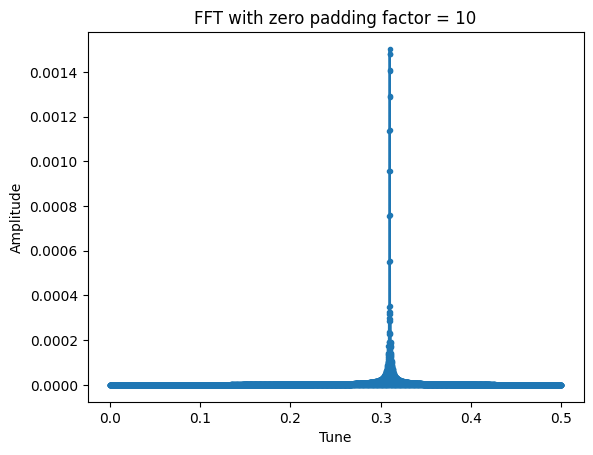

The tune is 0.31


In [16]:
# Zero padding
zero_padding_factor = 10
fft_try = np.fft.rfft(x_list0-np.mean(x_list0), n = len(x_list0) * zero_padding_factor)
#print(len(fft_try))
# Normalize the FFT result
fft_normalized = fft_try / len(fft_try)*2

# Calculate the frequency axis
sampling_frequency = 11245.5 # Adjust this to match your actual sampling frequency
freq_try = np.fft.rfftfreq(len(x_list0) *  zero_padding_factor, d=1/sampling_frequency)
#print(len(freq_try))


# Calculate the amplitude spectrum
fft_amplitude = np.abs(fft_normalized)
#print(fft_amplitude)


# Plot the frequency spectrum
plt.plot(freq_try/sampling_frequency, fft_amplitude, '.-')
plt.xlabel("Tune")
plt.ylabel("Amplitude")
plt.title("FFT with zero padding factor = 10")
#plt.xlim(0.22, 0.4)  # Nyquist frequency
#plt.xlim(2500, 4500)  
plt.show()
print('The tune is', freq_try[np.argmax(fft_amplitude)]/sampling_frequency)
#print('10 Hz', freq_try[np.argmax(fft_amplitude[0:1000])])

# 10000 turns, maybe this is the tune spread? -> nope
plt.plot(freq_try, fft_used, '.-r')
plt.xlim(0, sampling_frequency/2)
#plt.xlim(0.1, 0.5)
# find the tune

print(dir(twiss))
#ind = np.where(fft_used==np.max(fft_used))
ind = np.where(fft_amplitude==np.max(fft_amplitude))
freq_try[ind]
for i in range(len(freq_try[ind])):
    if freq_try[ind][i] > 0.1:
        freq_max = freq_try[ind][i]
        print('Frequency where max occurs = {f} Hz'.format(f=freq_max))

tune = (freq_max)/sampling_frequency
print('Tune = {t} horizontal oscillation per turn'.format(t = tune))



[0.00000000e+00 8.89244587e-05 1.77848917e-04 ... 8.88977813e-01
 8.89066738e-01 8.89155662e-01]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 22

"\ntotal_time = n_turns / f_rev\ntime = np.arange(0, total_time, 1/sampling_freq)\nsamples = np.sin(2*np.pi*f_ex*time + phi)\n\n\nexciter = xt.Exciter(_context = ctx,\n    samples = samples,\n    sampling_frequency = sampling_freq,\n    duration = None,  # defaults to waveform duration\n    frev = f_rev,\n    start_turn = 0,  # default, seconds\n    knl = KNL,\n    ksl = KSL,\n)\n\n# Add it to the line for tracking as usual\nline.insert_element(\n    element = exciter,\n    name = 'RF_KO_EXCITER',\n    index = 42,\n)\n\ninsertion of the element in the beamline, the phase should be broken due to the kick\n"

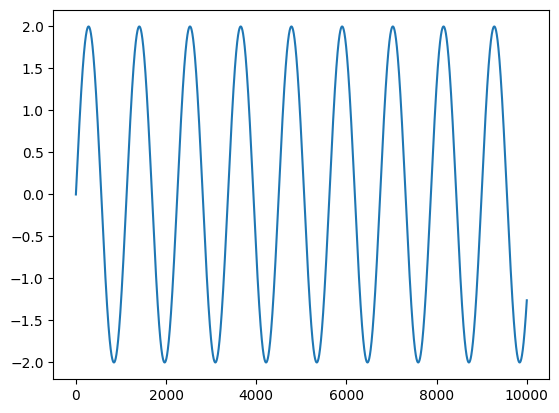

In [16]:
# Kick - a wave that is applied to the signal periodically, we choose a sine wave
phi = 0
f = 10 # Hz
A = 2
t = np.arange(10000)/sampling_frequency  # n = 10000, should be 50 in this case, but then the resolution is too low res =  sampling_frequency / frequency
print(t)
#t = np.linspace(0, 1, 50)
print(n)
kick = A * np.sin(2*np.pi*f*t + phi)
plt.plot(np.arange(10000), kick)

# example of a kick
'''
total_time = n_turns / f_rev
time = np.arange(0, total_time, 1/sampling_freq)
samples = np.sin(2*np.pi*f_ex*time + phi)


exciter = xt.Exciter(_context = ctx,
    samples = samples,
    sampling_frequency = sampling_freq,
    duration = None,  # defaults to waveform duration
    frev = f_rev,
    start_turn = 0,  # default, seconds
    knl = KNL,
    ksl = KSL,
)

# Add it to the line for tracking as usual
line.insert_element(
    element = exciter,
    name = 'RF_KO_EXCITER',
    index = 42,
)

insertion of the element in the beamline, the phase should be broken due to the kick
'''

In [17]:

#collider.build_trackers()
betx = twiss['betx'][0]
bety = twiss['bety'][0]
normal_emitt_x = 2.5e-6
normal_emitt_y = 2.5e-6

sigma_x = np.sqrt(betx*normal_emitt_x/(particles.gamma0*particles.beta0))[0]
sigma_y = np.sqrt(bety*normal_emitt_y/(particles.gamma0*particles.beta0))[0]
x = np.linspace(sigma_x, 3*sigma_x, 5)
px = np.zeros(5)
y = np.zeros(5)
py = np.zeros(5)
zeta = np.zeros(5)
delta = np.zeros(5)

particles = xp.Particles(
                    mass0=xp.PROTON_MASS_EV, q0=1, energy0=7000e9, x=x)

collider['lhcb1'].track(particles, num_turns=num_turns,
              turn_by_turn_monitor=True)

print(x)

ys = collider['lhcb1'].record_last_track.y
xs = collider['lhcb1'].record_last_track.x
print(xs)
qx_i = []
qy_i = []
for ii in range(len(x)):
    qx_i.append(PyNAFF.naff(xs[ii,:], turns=499)[0][1])
    qy_i.append(PyNAFF.naff(ys[ii,:], turns=499)[0][1])

[0.00020183 0.00030275 0.00040367 0.00050458 0.0006055 ]
[[ 2.01833363e-04  3.56515799e-04 -4.64319690e-04 ...  4.53231505e-04
   4.10855596e-05 -4.83458673e-04]
 [ 3.02750045e-04  5.34773670e-04 -6.96479493e-04 ...  7.51456308e-04
  -1.83512578e-04 -6.16258011e-04]
 [ 4.03666727e-04  7.13031522e-04 -9.28639258e-04 ...  9.58037510e-04
  -6.52397779e-04 -4.77424137e-04]
 [ 5.04583409e-04  8.91289352e-04 -1.16079898e-03 ...  7.71766738e-04
  -1.21420626e-03  1.22867864e-04]
 [ 6.05500090e-04  1.06954716e-03 -1.39295864e-03 ... -9.89982114e-05
  -1.36982850e-03  1.10856045e-03]]


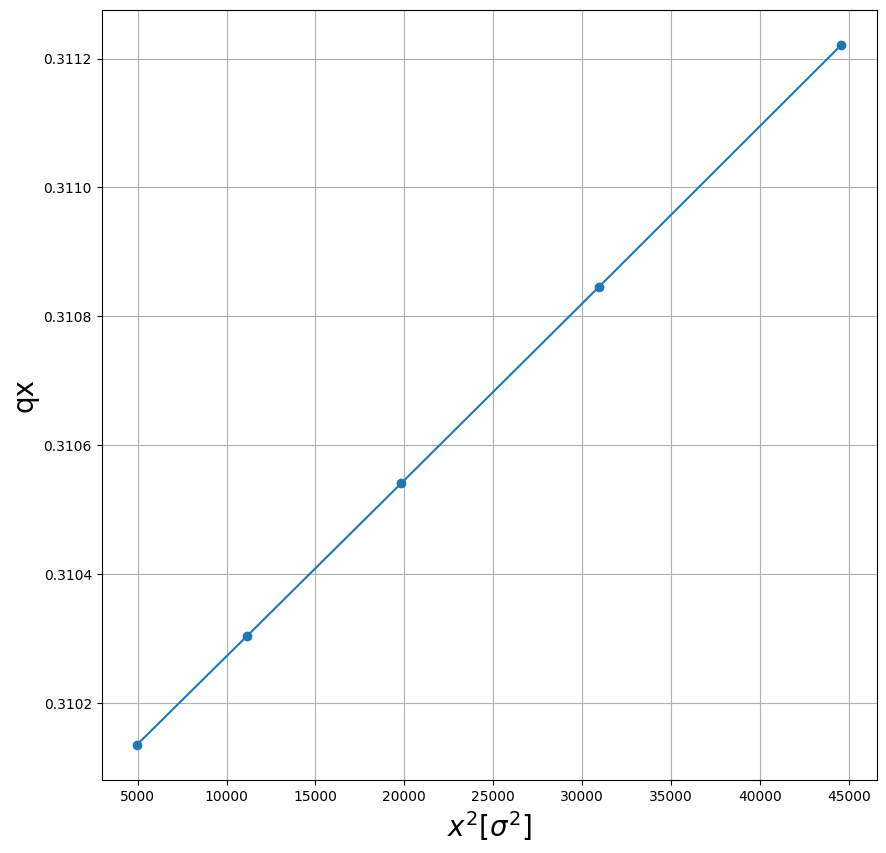

In [18]:
fig, ax = plt.subplots(figsize=(10, 10))
#plt.plot(qx_i,qy_i,'-o')
plt.plot(x**2/sigma_x**3,qx_i,'-o')
plt.xlabel(r'$x^{2}$[$\sigma^{2}$]', size = 20)
#plt.xlabel(r'qx', size = 20)

plt.ylabel(r'qx', size = 20)
plt.grid()

array([ 0.37, -0.37])

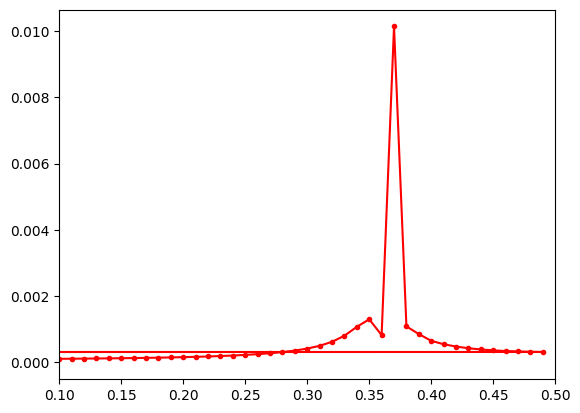

In [ ]:
# 50 turns, tune -.37, reference value is -0.352
plt.plot(freq_try, fft_try, '.-r')
plt.xlim(0.1, 0.5)
# find the tune
twiss = line_edited.twiss()
twiss.dqx
ind = np.where(fft_try==np.max(fft_try))
fft_try[ind]
freq_try[ind]


In [ ]:
line.twiss().betx

array([121.56684498, 121.56684498, 121.56684498, ..., 225.46408801,
       121.56684498, 121.56684498])

In [50]:
## take one bpm and do an fft



sampling_frequency = 11245.5
time = np.arange(0, 1, 1/sampling_frequency)
signal_fft = abs(np.fft.fft(x_list0))
signal_fft = signal_fft/len(signal_fft)*2. # normalization
signal_freqs = np.linspace(0, sampling_frequency, len(time))

def get_aliased_frequency(freq):
    while freq > sampling_frequency / 2:
        freq = abs(sampling_frequency-freq)
    return freq

freqs = [get_aliased_frequency(freq) for freq in signal_freqs]

ValueError: x and y must have same first dimension, but have shapes (11246,) and (50,)

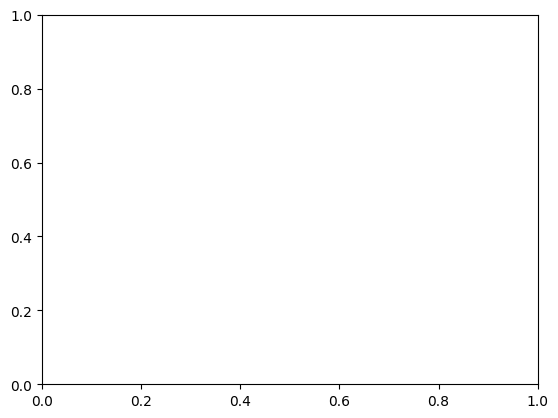

In [51]:
plt.plot(freqs, signal_fft)

In [9]:

# Now for a more realistic example we want to track a gaussian bunch of particles
# Matched to the RF bucket
N_particles = 10001
bunch_intensity = 2.2e11
normal_emitt_x = 2.5e-6 #m*rad
normal_emitt_y = 2.5e-6 #m*rad
sigma_z = 7.6e-2
particle_ref = xp.Particles(
                    mass0=xp.PROTON_MASS_EV, q0=1, energy0=7000e9)
gaussian_bunch = xp.generate_matched_gaussian_bunch(
        num_particles = N_particles, total_intensity_particles = bunch_intensity,
        nemitt_x = normal_emitt_x, nemitt_y=normal_emitt_y, sigma_z = sigma_z,
        particle_ref = particle_ref,
        line = collider['lhcb1'])
dir(gaussian_bunch)


*** Maximum RMS bunch length 0.11789515101464537m.
... distance to target bunch length: -7.6000e-02
... distance to target bunch length: 3.8638e-02
... distance to target bunch length: 3.4189e-02


... distance to target bunch length: 8.2053e-03
... distance to target bunch length: -1.2051e-02
... distance to target bunch length: 9.0274e-04
... distance to target bunch length: -2.7068e-05
... distance to target bunch length: 2.4776e-07
... distance to target bunch length: -1.1678e-07
--> Bunch length: 0.0759998832223215
--> Emittance: 2.178957765090958


['XoStruct',
 '_XoStruct',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_allclose',
 '_assert_values_consistent',
 '_beta0',
 '_beta0_setitem',
 '_buffer',
 '_bypass_linked_vars',
 '_capacity',
 '_cname',
 '_contains_lost_or_unallocated_particles',
 '_context',
 '_delta',
 '_delta_setitem',
 '_extra_c_sources',
 '_fields',
 '_gamma0',
 '_gamma0_setitem',
 '_has_valid_rng_state',
 '_init_random_number_generator',
 '_inverse_rename',
 '_kernels',
 '_movable',
 '_move_to',
 '_num_active_particles',
 '_num_lost_particles',
 '_num_shown_particles',
 '_offset',
 '_overridable',
 '_p0c',
 '_p0c_setitem',
 '_ptau',
 '_ptau_setitem',
 '_py_

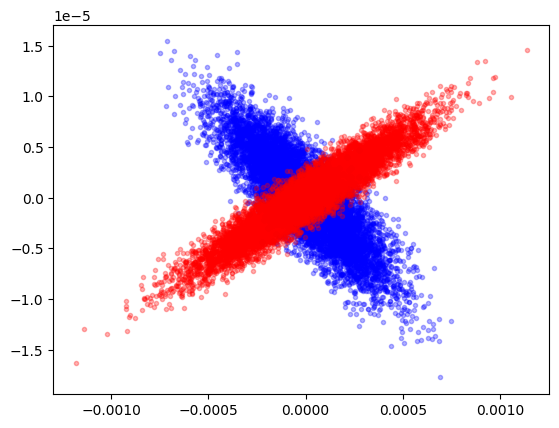

In [10]:

starting_x = gaussian_bunch.x
starting_y = gaussian_bunch.y
starting_px = gaussian_bunch.px
starting_py = gaussian_bunch.py
plt.plot(starting_x, starting_px, '.b', alpha=0.3)
plt.plot(starting_y, starting_py, '.r', alpha=0.3)


Text(0.5, 1.0, 'Transverse phase space')

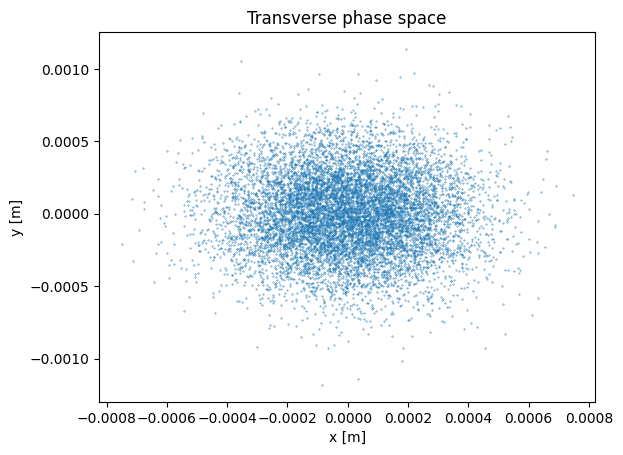

In [11]:
plt.scatter(starting_x, starting_y, s = 0.1)
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Transverse phase space')

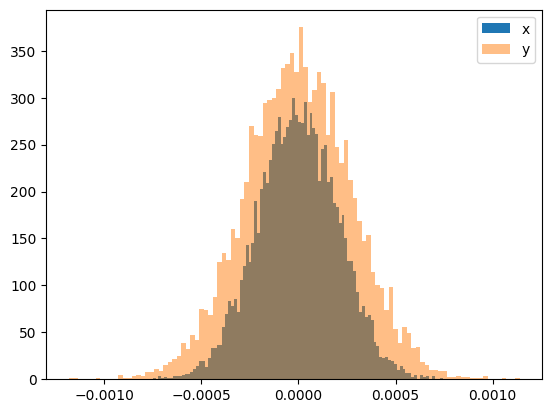

In [12]:
# Distribution of the gaussian bunch in x and y

plt.hist(starting_x, bins=100, label = 'x')
plt.hist(starting_y, bins=100, alpha=0.5, label='y')
plt.legend()

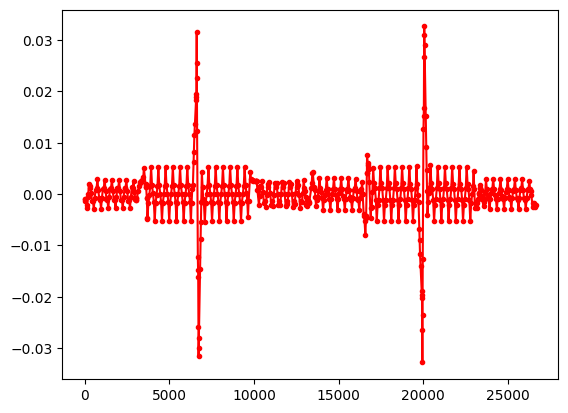

In [13]:
s_list = [monitors[ii].s[0,0] for ii in monitors]
x_list = [monitors[ii].x[0,0] for ii in monitors]
plt.plot(s_list, x_list, '.-r')

In [14]:
collider['lhcb1'].track(gaussian_bunch, num_turns = num_turns)

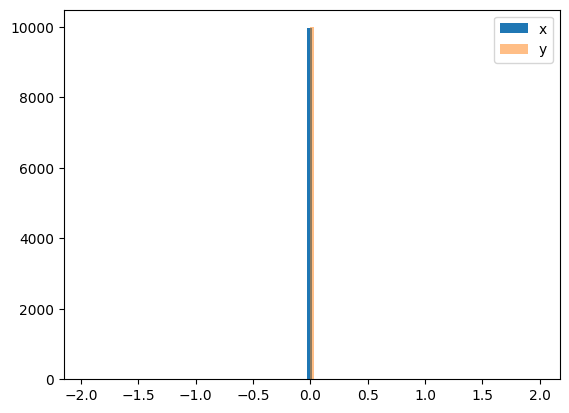

In [ ]:
ending_x = context.nparray_from_context_array(gaussian_bunch.x).copy()
ending_y = context.nparray_from_context_array(gaussian_bunch.y).copy()
ending_px = context.nparray_from_context_array(gaussian_bunch.px).copy()
ending_py = context.nparray_from_context_array(gaussian_bunch.py).copy()
plt.hist(ending_x, bins=100, label = 'x')
plt.hist(ending_y, bins=100, alpha=0.5, label='y')
plt.legend()

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 9.974e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+0

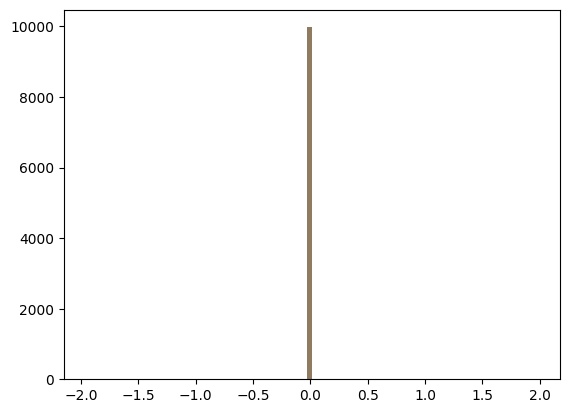

In [ ]:
plt.hist(starting_x, bins=100)
plt.hist(ending_x, bins=100, alpha=0.5)

Text(0.5, 1.0, 'Transverse phase space')

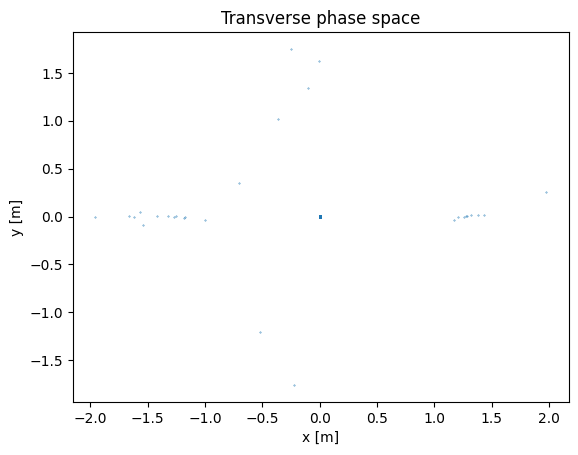

In [ ]:
plt.scatter(ending_x, ending_y, s = 0.1)
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Transverse phase space')

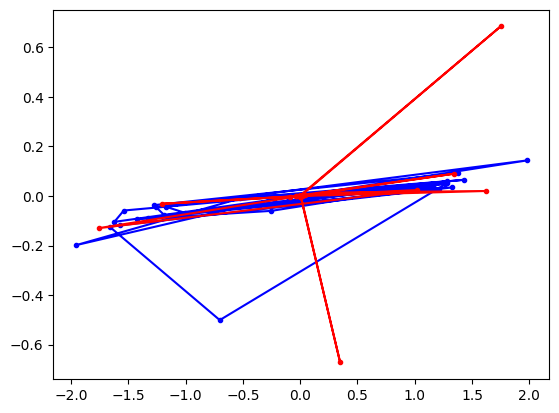

In [ ]:
plt.plot(ending_x, ending_px, '.-b')
plt.plot(gaussian_bunch.y, gaussian_bunch.py, '.-r')